## Salary Data Exploration Project
### Project Description
In 2019 Kaggle hosted an open data scientist competition. The competition was titled "Kaggle ML & DS Survey Challenge". The challenge prompt was as follows: *"tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration"* (https://www.kaggle.com/c/kaggle-survey-2019/data). The repository addresses the prompt providing insight into the the nature of women's represenation in DS & ML along with the effects of education on income level.

### Exploratory Data Analysis: Survey Dataset
To begin our analysis of the datasets, we must import them first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

dataset_folder = "dataset/"
mc_dataset = "multiple_choice_responses.csv"
salary_dataset = "clean_kaggle_data.csv"

mc_df = pd.read_csv(dataset_folder + mc_dataset, low_memory=False)
salary_df = pd.read_csv(dataset_folder + salary_dataset, low_memory=False)

In [2]:
print("Salary DF shape = {}".format(salary_df.shape))

Salary DF shape = (12497, 247)


The salary dataset has 12497 entries and 247 columns. We will consider the columns pertaining to country, age, education, professional experience, and salary.

In [3]:
# Selecting and renaming the aformentioned columns:
salary_df = salary_df[["Q2", "Q3", "Q1", "Q4", "Q5", "Q10"]]
salary_df = salary_df.rename(columns={"Q2": "sex", "Q3": "country", "Q1": "age", "Q4": "educ", "Q5": "prof_exp", "Q10": "salary"})
columns = ["sex", "country", "age", "educ", "prof_exp", "salary"]
salary_df.head()

,sex,country,age,educ,prof_exp,salary
0,Male,France,22-24,Master’s degree,Software Engineer,40000
1,Male,India,40-44,Professional degree,Software Engineer,7500
2,Male,Australia,40-44,Master’s degree,Other,300000
3,Male,India,22-24,Bachelor’s degree,Other,5000
4,Male,France,50-54,Master’s degree,Data Scientist,70000


In [4]:
salary_df[columns[:5]].describe()

,sex,country,age,educ,prof_exp
count,12497,12497,12497,12497,12497
unique,4,59,11,7,10
top,Male,India,25-29,Master’s degree,Data Scientist
freq,10473,2477,3075,5868,3640


In [5]:
salary_df["salary"].describe()

count     12497.000000
mean      57124.189806
std       73710.709307
min        1000.000000
25%        7500.000000
50%       30000.000000
75%       80000.000000
max      500000.000000
Name: salary, dtype: float64

The following provides insight into the possible values that each entry can take with respect to each column:

- country (Q3): e.g. "Canada", "India"
- age (Q1): "18-21", "22-24", "25-29", "30-34", "35-39"
- educ (Q4): e.g. "Master's degree"
- prof_exp (Q5): e.g. "Data Scientist", "Software Engineer"
- salary (Q10): ranges from 1k-500k (float64)

#### Countplot of Country Data
The Figure below illustrates the distribution of data with respect to the country column. As we can see, the responses came primarily from people from India and the United States.

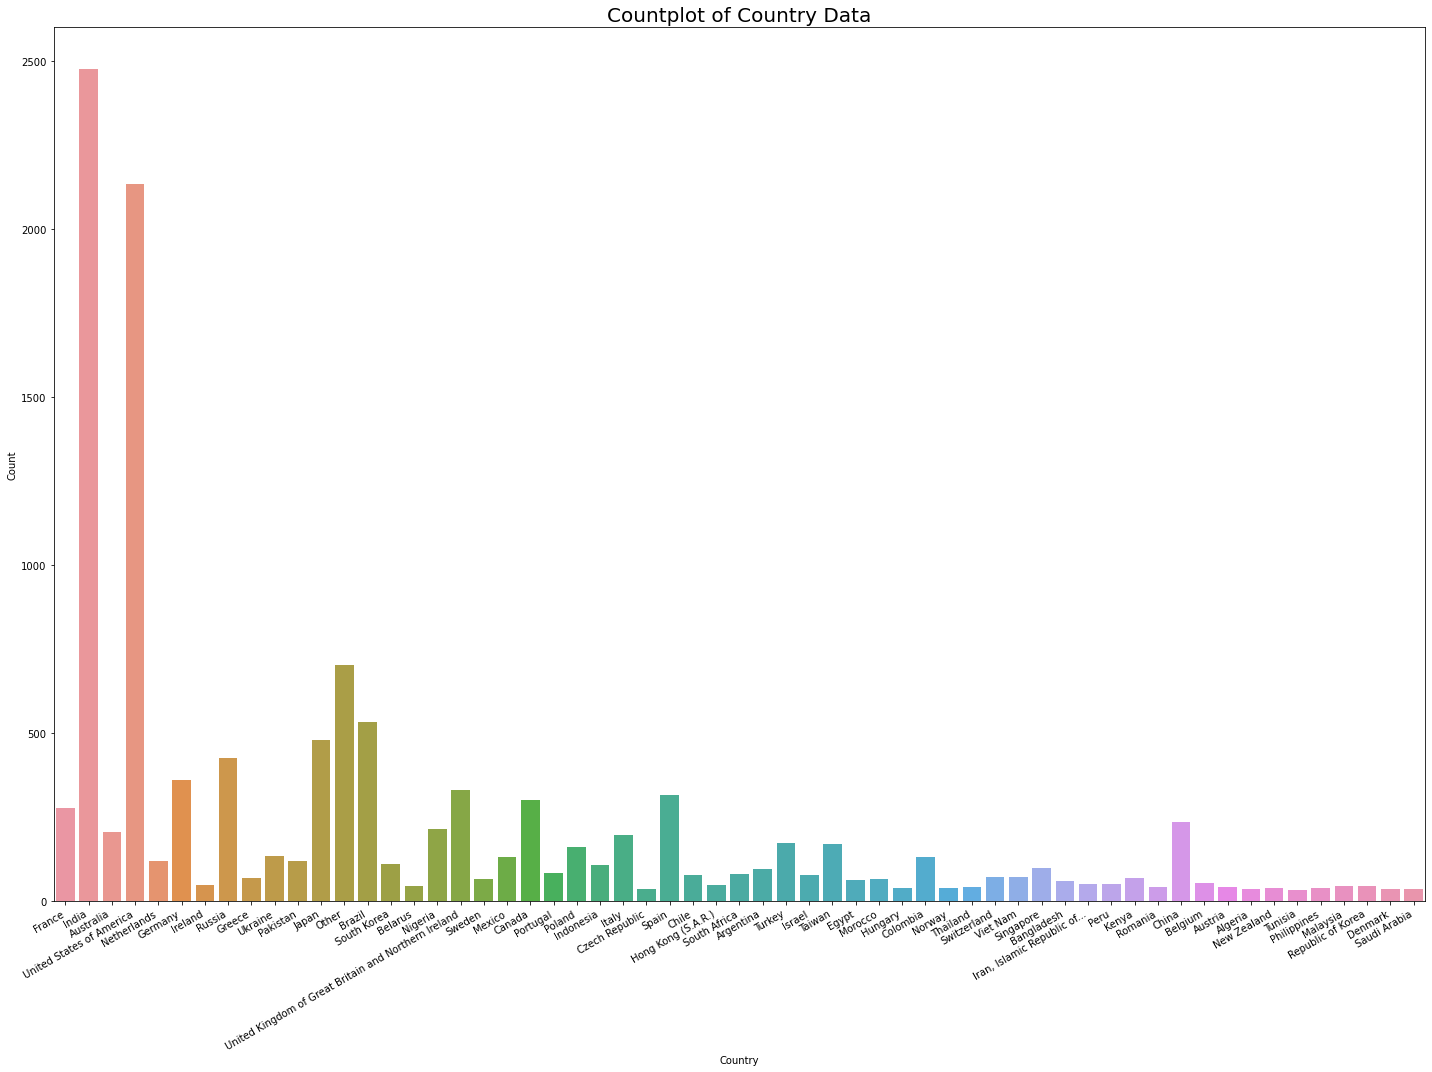

In [6]:
plt.figure(figsize=(20,15))
plt.title("Countplot of Country Data", fontsize=20)
country_plot = sb.countplot(x='country', data=salary_df)
country_plot.set_xticklabels(country_plot.get_xticklabels(), size=10 ,rotation=30, ha="right")
country_plot.set_xlabel("Country")
country_plot.set_ylabel("Count")
plt.tight_layout()
plt.show()

#### Countplot of Professional Experience by Age Range
The plot below illustrates the breakdown of professional experience in each age range. We can see that data scientists were most frequently surveyed for nearly all age ranges. Further, people in the 25-29 age range were the most heavily surveyed. 

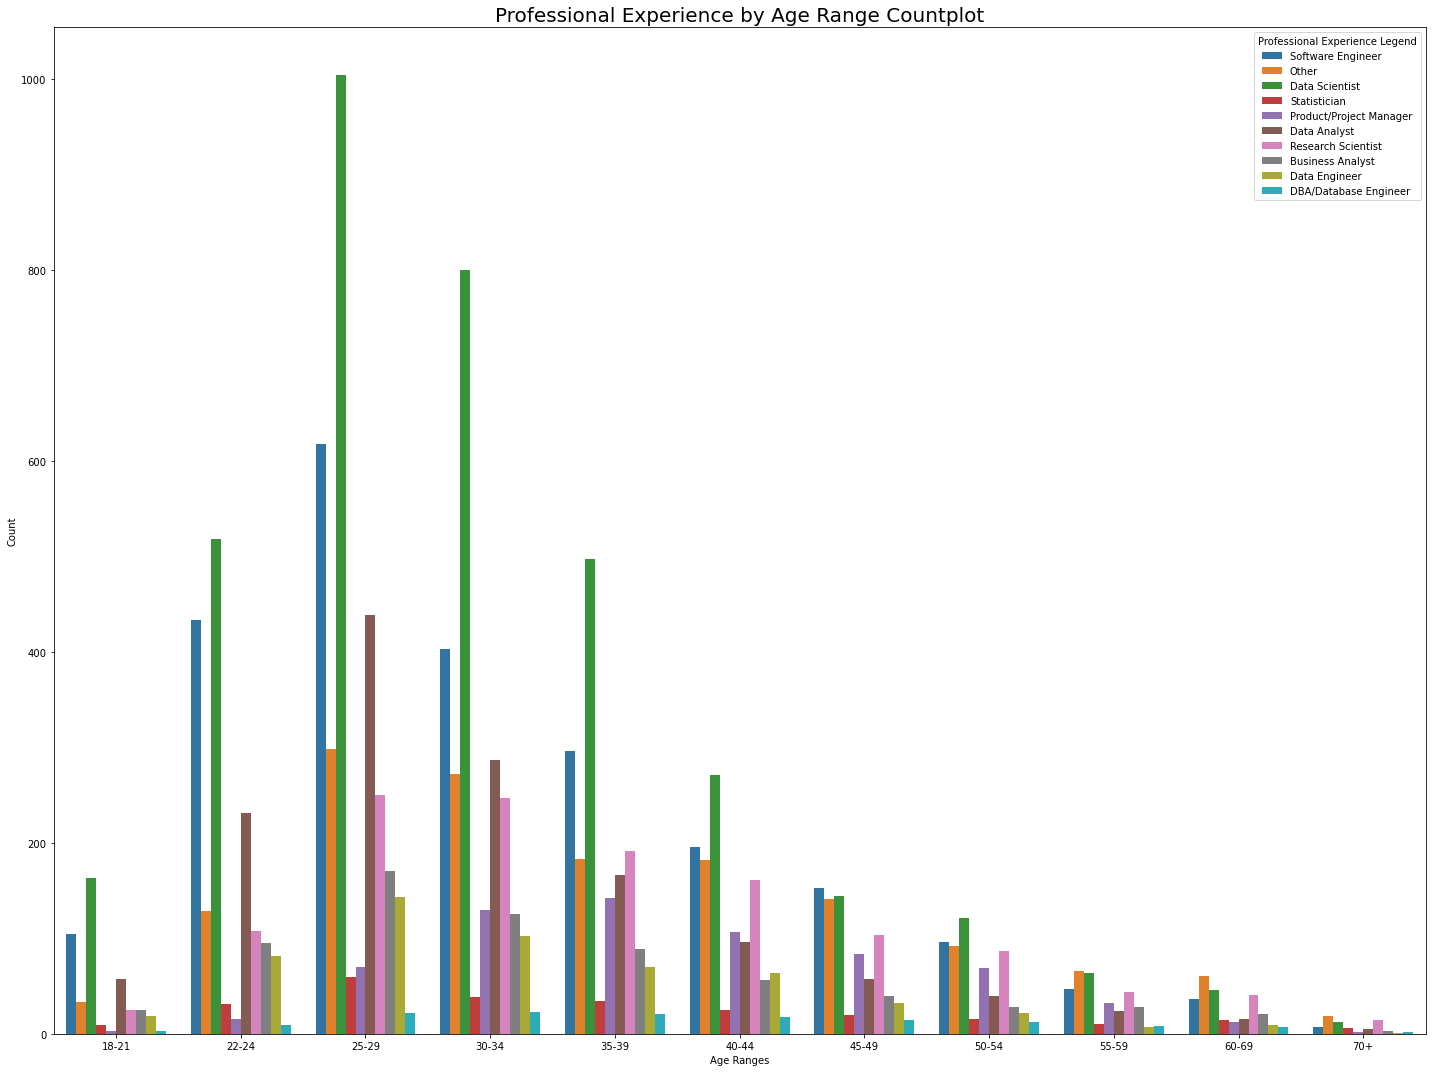

In [7]:
plt.figure(figsize=(20,15))
plt.title("Professional Experience by Age Range Countplot", fontsize=20)
age_exp_plot_order = ["18-21", "22-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70+"]
age_exp_plot = sb.countplot(x='age', hue='prof_exp', data=salary_df, order=age_exp_plot_order)
age_exp_plot.legend(title="Professional Experience Legend")
age_exp_plot.set_xlabel("Age Ranges")
age_exp_plot.set_ylabel("Count")
plt.tight_layout()
plt.show()

#### Boxplot of Salary vs. Education
From the boxplot below, we can see that the average salary of people who obtained a master's degree or doctoral degree is higher than the average salary of those who obtained a bachelor's degree, those who chose not to answer, and those who received some post-secondary education without obtaining a bachelor's degree. We can also see that the earning potential delineated by the maximum values (between the 3rd quartile and the outliers) of the doctoral boxplot stretch significantly higher than any other education tier. 


In [8]:
education_list = salary_df["educ"].unique()

def rename_educ(educ_level):
    if educ_level == education_list[4]:
        return "Unfinished post-sec"
    elif educ_level == education_list[-1]:
        return "No post-sec"
    return educ_level

salary_df["educ"] = salary_df["educ"].map(rename_educ)
education_list = salary_df["educ"].unique()



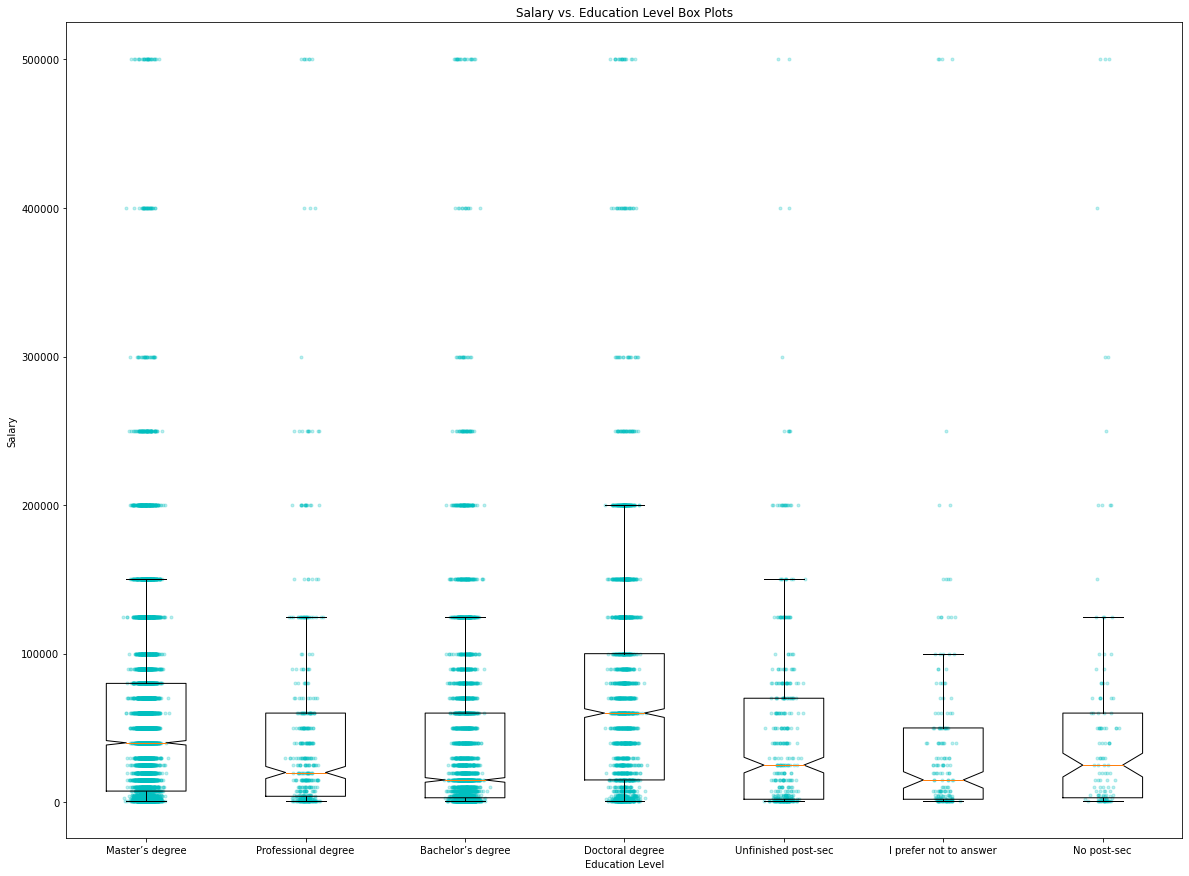

In [9]:

bp_inputs = []
fig, ax = plt.subplots(figsize=(20,15))
for i in [0, 1, 2, 3, 4, 5, 6]:
    y = salary_df.salary[salary_df.educ==education_list[i]].dropna()        
    x = np.random.normal(i+1, 0.04, size=len(y))
    ax.plot(x, y, 'c.', alpha=0.25)
    bp_inputs.append(salary_df[salary_df["educ"] == education_list[i]]["salary"])

bp_inputs = np.array(bp_inputs, dtype=object)
ax.set_xlabel("Education Level")
ax.set_ylabel("Salary")
ax.set_title("Salary vs. Education Level Box Plots")
ax.boxplot(bp_inputs, [i for i in range(7)], showfliers=False)
ax.set_xticklabels(education_list)
fig.show()

### Estimating the Difference Between Average Salary of Males vs. Females
#### Descriptive Statistics

#### Salary vs. Gender Box Plots
Given that we are computing descriptive statistics about males and females, it makes sense to illustrate a box plot of the salaries of males and females to visualize the data. From the plot below we can already appreciate that the average salary of males is noticably higher than that of females as illustrated by the position of Q2. Further, the 3rd quartile is noticably higher for males perhaps hinting at a higher earning potential.

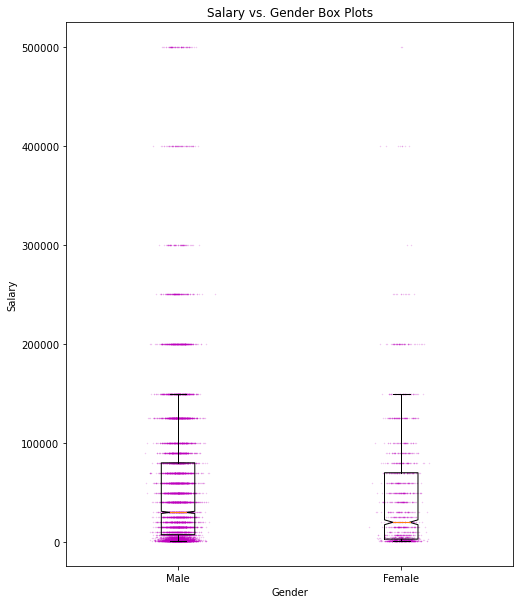

In [10]:

bp_inputs = []
genders = ["Male", "Female"]
fig, ax = plt.subplots(figsize=(8, 10))
for i in [0, 1]:
    y = salary_df.salary[salary_df.sex==genders[i]].dropna()        
    x = np.random.normal(i+1, 0.04, size=len(y))
    ax.plot(x, y, 'm.', alpha=0.25, markersize=0.8)
    bp_inputs.append(salary_df[salary_df["sex"] == genders[i]]["salary"])

bp_inputs = np.array(bp_inputs, dtype=object)
ax.set_xlabel("Gender")
ax.set_ylabel("Salary")
ax.set_title("Salary vs. Gender Box Plots")
ax.boxplot(bp_inputs, [i for i in range(2)], showfliers=False)
ax.set_xticklabels(genders)
fig.show()

In [24]:
males_df = salary_df[salary_df["sex"] == "Male"]
females_df = salary_df[salary_df["sex"] == "Female"]
print("Number of males in the dataset = {}".format(males_df.shape[0]))
print("Number of females in the dataset = {}".format(females_df.shape[0]))
print("Number of people that prefer to self-describe or prefer not to say = {}".format(salary_df.shape[0] - males_df.shape[0] - females_df.shape[0]))

Number of males in the dataset = 10473
Number of females in the dataset = 1827
Number of people that prefer to self-describe or prefer not to say = 197


In [12]:
males_df.salary.describe()

count     10473.000000
mean      58709.586556
std       74920.620048
min        1000.000000
25%        7500.000000
50%       30000.000000
75%       80000.000000
max      500000.000000
Name: salary, dtype: float64

In [13]:
females_df.salary.describe()

count      1827.000000
mean      45933.771210
std       60253.789591
min        1000.000000
25%        3000.000000
50%       20000.000000
75%       70000.000000
max      500000.000000
Name: salary, dtype: float64

In [14]:
# Possible Professional Occupations:
salary_df["prof_exp"].unique()

array(['Software Engineer', 'Other', 'Data Scientist', 'Statistician',
       'Product/Project Manager', 'Data Analyst', 'Research Scientist',
       'Business Analyst', 'Data Engineer', 'DBA/Database Engineer'],
      dtype=object)

As we can see from the above descriptive statistics and box plots, the average salary of men and women working in the occupations listed above is different. Men make `$`58,710 on average whereas women make `$`45,934 according to this sample. The next section will perform a two-sample t-test to determine if this result is statistically significant.

#### Two-Sample t-Test

Given that the sample sizes of both groups is greater than 30, we are making inferences about the mean, and the variances of the samples are similar, we can perform a t-test and assume that the distribution of the means of the samples is normal. Since we do not know the standard deviation or mean of the population, we will use a t-test as opposed to a z-test. Our null hypothesis is that the means of the salaries earned by men and women are equal. Our alternate hypothesis is that the means are different, i.e., the average salary women earn is less than or greater than the average salary men earn. The following code snippet computes the t and p value for the the male and female data samples:

In [15]:
tc, pc = stats.ttest_ind(males_df["salary"], females_df["salary"])
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = 6.90935  p = 5.10894e-12


The p-value, or, the probability that we observed these two completely random samples in a world where the null hypothesis is true, i.e. the world in which the means of the salaries of men and women are equal, is 5.10894e-12%. This is less than our threshold of 0.05. Therefore, the difference between the means of these two samples is statistically significant. 

#### Bootstrapping
We will now compare the two samples using bootstrapping. To do so, we will generate 1000 bootstrap samples for each group. Each of these generated samples will be the same size as the sample it was generated from. Given that we are generating 1000 bootstrap samples, we expect the distribution of the sample means to be normal for both groups. 

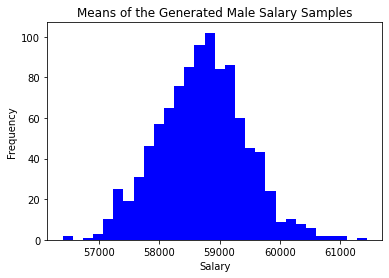

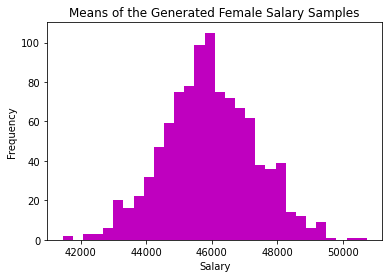

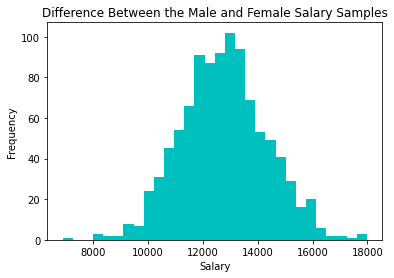

In [16]:
np.random.seed(10)
male_means = np.zeros(1000, dtype=float)
female_means = np.zeros(1000, dtype=float)

for i in range(1000):
    male_sample = np.random.choice(males_df.salary, replace=True, size=males_df.salary.shape[0])
    female_sample = np.random.choice(females_df.salary, replace=True, size=females_df.salary.shape[0])

    female_means[i] = np.mean(female_sample)
    male_means[i] = np.mean(male_sample)
    
bootstrap_difference = male_means - female_means

plt.hist(male_means, bins=30, color='b')
plt.title("Means of the Generated Male Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

plt.hist(female_means, bins=30, color='m')
plt.title("Means of the Generated Female Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

plt.hist(bootstrap_difference, bins=30, color='c')
plt.title("Difference Between the Male and Female Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

#### Two-Sample t-Test
1000 data points were created as a result of the bootstrapping process. Therefore, since we have more than 30 data points, we are making inferences about the means of the male and female groups, and the data was sampled independently, the distribution of the sample means sampled from the original distributions is normal. Further, since we do not know the standard deviation or the variance of the population, a t-test is in order (as opposed to a z-test). Just as before, our null hypothesis is that the means of the populations of the two samples are equivalent. Our alternate hypothesis is that they're different. 

In [17]:
tc, pc = stats.ttest_ind(male_means, female_means)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = 258.205  p = 0


Since p is very close to 0 (p cannot be zero because there is a small probability that we observed the bootstrapped data) and is therefore lesss than our threshold, 0.05, the result is statistically significant.

#### Discussion
A large sample of people from a wide variety of education levels, professions, and countries was obtained and analyzed. After computing some descriptive statistics on the men of the dataset, and then the women of the dataset, a difference in the means of the salaries of the men and the women was observed. Since there were a significant number of entries in each sample and an inference on the means of the samples was in question, a two-tailed t-test was performed with a threshold of 0.05. The t-test yielded a p-value much lower than 0.05. From this we reasoned that the obesrved sample was statistically significant. To confirm the statistical significance of the observed samples and to estimate the difference between the means of the samples, bootstrapped data was generated. Both the female and male salary datasets were sampled from with replacement 1000 times. This sampling process generated two normal distributions. Since the distributions were normal and contained 1000 points (much more than 30), another t-test with a threshold of 0.05 was performed to compare the means. The p-value was, once again, much lower than our threshold of 0.05. This confirmed the statistical significance of the observed samples.

The difference between the male and female salary distributions was then computed. The code snippet below delineates the mean of this distribution. This mean is a rough estimate of the difference of the salaries of the males and females present in the sampled population.

In [18]:
print("The average of the difference of the salaries of the males and females in this dataset is = ${}".format(round(bootstrap_difference.mean(), 2)))

The average of the difference of the salaries of the males and females in this dataset is = $12772.14


Since the analysis was univariate, it is difficult to infer why this statistically significant salary difference occurred. It would make sense to continue the analysis by examining the difference between male and female salaries for each occupation at each company. If there was a statistically significant difference present when considering male and female data scientists working at Google, for example, then we could perhaps infer that Google was compensating men and women differently for the exact same job. It is in this way that analyzing data can help motivate social change and enforce corporate responsibility.

### The Impact of Education on Salary
#### Descriptive Statistics

In [19]:
masters_df = salary_df[salary_df["educ"] == "Master’s degree"]
phd_df = salary_df[salary_df["educ"] == "Doctoral degree"]
ba_df = salary_df[salary_df["educ"] == "Bachelor’s degree"]

print("Master's Degree descriptive salary statistics:\n\n", masters_df.salary.describe())
print("\n\nPhD descriptive salary statistics:\n", phd_df.salary.describe())
print("\n\nBachelor's descriptive salary statistics:\n", ba_df.salary.describe())

Master's Degree descriptive salary statistics:

 count      5868.000000
mean      58778.629857
std       70265.728605
min        1000.000000
25%        7500.000000
50%       40000.000000
75%       80000.000000
max      500000.000000
Name: salary, dtype: float64


PhD descriptive salary statistics:
 count      2083.000000
mean      75761.401824
std       83376.717093
min        1000.000000
25%       15000.000000
50%       60000.000000
75%      100000.000000
max      500000.000000
Name: salary, dtype: float64


Bachelor's descriptive salary statistics:
 count      3361.000000
mean      44999.256174
std       67923.680798
min        1000.000000
25%        3000.000000
50%       15000.000000
75%       60000.000000
max      500000.000000
Name: salary, dtype: float64


As we can see from the descriptive statistics above, the mean of the salary column for those that obtain a PhD, those that obtain a master's, and those that earn a bachelor's is different. To determine if this result is statistically significant, we can conduct a one-way ANOVA.

#### One-Way Anova
The purpose of performing a one-way ANOVA in this context is to determine if the difference in the sample mean of one of samples relative to all of the other samples is statistically significant. We can perform this analysis because our data was sampled independently, there are more than 30 data entries in each sample, and the standard deviations of the samples are similar as shown above. To perform an ANOVA, we must compute the F-statistic. Our null hypothesis is that the means of all of the populations that the samples were drawn from are equal. From the F-statistic we will compute the p value and compare that value with our threshold of 0.05.

In [20]:
f_stat, p_val = stats.f_oneway(phd_df.salary, masters_df.salary, ba_df.salary)
print ("F-stat: F = %g  p = %g" % (f_stat, p_val))

F-stat: F = 117.839  p = 2.23367e-51


Since the p-value of 2.23367e-51 computed above is less than 0.05, we reject the null hypothesis and confirm that the observed data is statistically significant. Either one mean of one of the samples differs from the rest of the group or each sample mean is unique. 

#### Education Bootstrap
Now we will bootstrap the data samples and illustrate the resulting distributions for each sample. We will also illustrate the difference between each distribution combination.

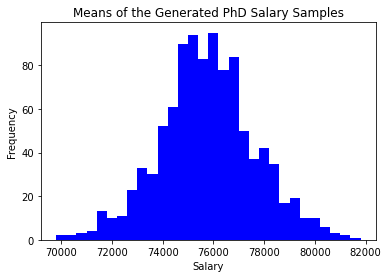

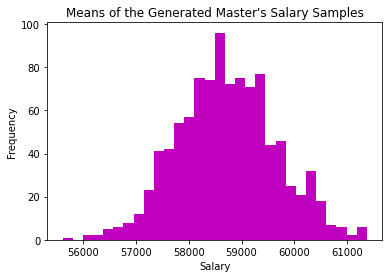

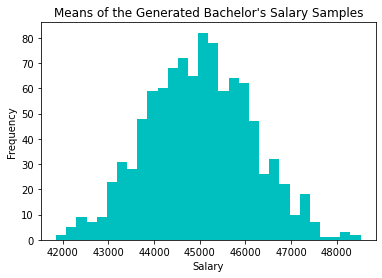

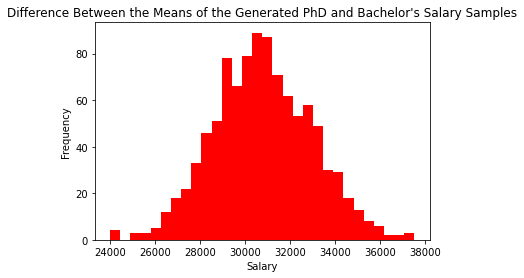

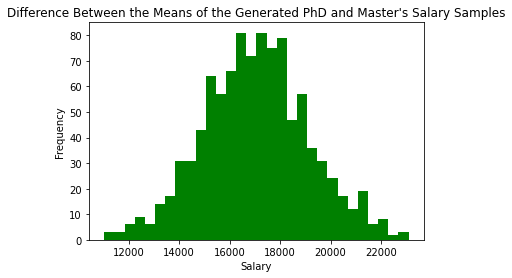

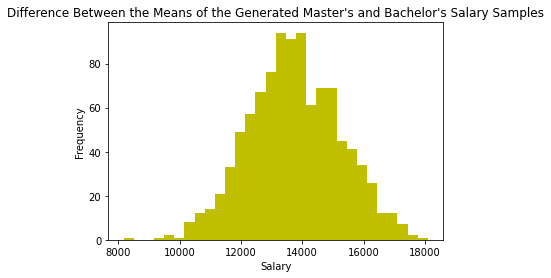

In [21]:
np.random.seed(10)


phd_means = np.zeros(1000, dtype=float)
master_means = np.zeros(1000, dtype=float)
ba_means = np.zeros(1000, dtype=float)

for i in range(1000):
    phd_sample = np.random.choice(phd_df.salary, replace=True, size=phd_df.salary.shape[0])
    master_sample = np.random.choice(masters_df.salary, replace=True, size=masters_df.salary.shape[0])
    ba_sample = np.random.choice(ba_df.salary, replace=True, size=ba_df.salary.shape[0])

    phd_means[i] = np.mean(phd_sample)
    master_means[i] = np.mean(master_sample)
    ba_means[i] = np.mean(ba_sample)
    

plt.hist(phd_means, bins=30, color='b')
plt.title("Means of the Generated PhD Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

plt.hist(master_means, bins=30, color='m')
plt.title("Means of the Generated Master's Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

plt.hist(ba_means, bins=30, color='c')
plt.title("Means of the Generated Bachelor's Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

phd_ba = phd_means - ba_means
phd_masters = phd_means - master_means
master_ba = master_means - ba_means

plt.hist(phd_ba, bins=30, color='r')
plt.title("Difference Between the Means of the Generated PhD and Bachelor's Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

plt.hist(phd_masters, bins=30, color='g')
plt.title("Difference Between the Means of the Generated PhD and Master's Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

plt.hist(master_ba, bins=30, color='y')
plt.title("Difference Between the Means of the Generated Master's and Bachelor's Salary Samples")
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()



From the difference distributions above, we can approximate the average salary increase accross each education group. Note that since we do not have access to the entire population, this is only a rough approximation. 

In [22]:
print("Average salary difference between PhD earners and bachelor's earners = ${}".format(round(phd_ba.mean(), 2)))
print("Average salary difference between PhD earners and master's earners = ${}".format(round(phd_masters.mean(), 2)))
print("Average salary difference between master's earners and bachelor's earners = ${}".format(round(master_ba.mean(), 2)))

Average salary difference between PhD earners and bachelor's earners = $30785.89
Average salary difference between PhD earners and master's earners = $17045.44
Average salary difference between master's earners and bachelor's earners = $13740.45


#### Statistical Significance Using Bootstrapped Data
Using the bootstrapped distributions obtained above, we can perform another ANOVA to confirm that at least one of the means of the samples is different from the rest. The data was independently sampled, each sample has more than 30 entries, and the standard deviation of each sample is similar. Further, each sample is normally distributed. Therefore, we can continue with our ANOVA. The null hypothesis is that the means of all of the samples are equal. The alternate hypothesis is that one or more of the samples has a mean that is different than the others. As such, we will continue with our ANOVA by calculating the F-statistic and the p value:

In [23]:
f_stat, p_val = stats.f_oneway(phd_means, master_means, ba_means)
print ("F-stat: F = %g  p = %g" % (f_stat, p_val))

F-stat: F = 125127  p = 0


Since p is very close to 0 and less than our threshold value of 0.05, we can conclude that the observed samples are statistically significant and the mean of at least one of the samples is different than the others. 

#### Discussion
In this section we analyzed the salaries of three different groups of people. These groups were people whose highest earned degree was either a PhD, Bachelor's degree, or a Master's degree. We began our analysis by computing some descriptive statistics about the samples. We observed that while the standard deviations of the samples were similar, the means were different. When sampling from a population we expect the means of each sample to be different because each sample is likely going to be unique. To determine if the difference in the means of the three groups was statistically significant, we had to perform a statistical analysis of the data. 

Since there were three groups in question, we decided to perform an ANOVA. We did not compute the t-statistic because there were more than 2 groups. Given the similarity of the standard deviations, the volume of the data, and the fact that the data was independently sampled, we were able to compute the F-statistic and then the resultant p-value. The computed p-value was less than our threshold p-value of 0.05 so we accepted the alternate hypothesis that at least one of the means of the samples was different than the rest.

We then generated three samples of the means of each group by bootstrapping with 1000 sampling iterations. Using these distributions, we computed the difference between the average salaries of those that held a PhD, Master's, or Bachelor's degree. We then conducted another ANOVA to confirm the alternate hypothesis that at least one of the means of the samples was different than the means of the other samples. Once again, the p-value was near 0 and less than 0.05 so the alternate hypothesis was confirmed and the observed samples were deemed statistically significant.

Since we did not explicitly compare accross each group individually, we do not know which group has a mean that is statistically different than the rest. A logical next step would be to compute a two-sample t-test between the PhD and Bachelor's degree groups. Then, using the information gathered from this analysis, continue on with another t-test between the Master's degree and Bachelor's group. Computing the t-test for each combination, although tedious, could prove to be an effective way to characterize the statistical significance of the difference of the means of the salaries between each group. 

We did learn from this analysis that obtaining a higher education after completing a bachelor's degree contributes to a statistically significant salary increase. The approximate average increase appreciated after earning a Master's degree is `$`13,740.45 and the approximate average increase from a Bachelor's degree after earning a PhD is `$`30,785.89. 